In [1]:
import numpy as np
from sklearn.metrics import roc_curve, RocCurveDisplay, roc_auc_score
import matplotlib.pyplot as plt

from Map_functions import Map_functions


c:\Users\jourd\OneDrive\Documents\UCL\Masters_Dissertation\Final_Code\ROC_validation\Tools\crismProcessing_parallel.py:23: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @nb.jit("f4[:, :](f4[:], f4[:])")


In [2]:
# Create the Classification
data = Map_functions().create_map(f_name = 'validation_spectra_noise.hdr', i_name = 'validation_labels_noise.hdr', tester = True)

Normalising Spectra: 100%|██████████| 700/700 [02:12<00:00,  5.30it/s]


15313/15313 [==============================] - 93s 6ms/step


In [13]:
from spectral.io import envi
predictions = envi.open('normalised_classification_Cosine_BestGuess.hdr').load()
tester = envi.open('tester.hdr').load()
labels = envi.open('validation_labels_noise.hdr').load()

prediction_flat = predictions.reshape(-1, predictions.shape[2])
tester_flat = tester.reshape(-1, tester.shape[2])
validation_flat = labels.reshape(-1)


In [12]:
# find the accuracy
tester_acc = 0
pred_co = 0
for i in range(len(prediction_flat)):
    if np.argmax(prediction_flat[i]) == validation_flat[i]:
        pred_co += 1
    if np.argmax(tester_flat[i]) == validation_flat[i]:
        tester_acc += 1

print('Accuracy of the prediction: ', pred_co/len(prediction_flat))
print('Accuracy of the tester: ', tester_acc/len(tester_flat))

Accuracy of the prediction:  0.6488224489795918
Accuracy of the tester:  0.4915265306122449


In [17]:
pred2 = tester_flat
num_classes = pred.shape[-1]
labels = validation_flat.astype(np.int32)

# Sanity check
assert num_classes == labels.max() + 1

# One hot encoding of labels
onehot_labels2 = np.zeros_like(pred2)
onehot_labels2[np.arange(onehot_labels2.shape[0]), labels] = 1

In [18]:
pred = prediction_flat
num_classes = pred.shape[-1]
labels = validation_flat.astype(np.int32)

# Sanity check
assert num_classes == labels.max() + 1

# One hot encoding of labels
onehot_labels = np.zeros_like(pred)
onehot_labels[np.arange(onehot_labels.shape[0]), labels] = 1

Best threshold for Nontronite: 0.8696445226669312


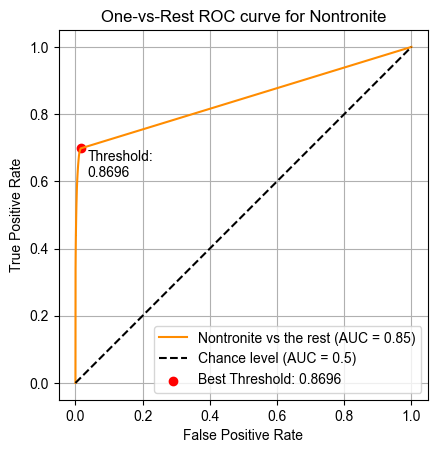

In [24]:

def find_best_threshold(tpr, fpr, thresholds):
    # Calculate the Euclidean distance for each point from the top-left corner
    distances = np.sqrt((1 - tpr)**2 + fpr**2)
    
    # Find the index of the smallest distance
    best_index = np.argmin(distances)
    
    # Return the corresponding threshold and its TPR and FPR
    return thresholds[best_index], fpr[best_index], tpr[best_index]

# Assuming onehot_labels and pred are defined previously
class_id = 3
class_name = list(FULL_NAMES.values())[class_id]

# Compute TPR, FPR, and thresholds
fpr, tpr, thresholds = roc_curve(onehot_labels[:, class_id], pred[:, class_id])

# Compute best threshold and its TPR and FPR
best_thresh, best_fpr, best_tpr = find_best_threshold(tpr, fpr, thresholds)
print(f"Best threshold for {class_name}: {best_thresh}")

# Plot ROC curve
RocCurveDisplay.from_predictions(
    onehot_labels[:, class_id],
    pred[:, class_id],
    name=f"{class_name} vs the rest",
    color="darkorange",
    plot_chance_level=True,
)
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"One-vs-Rest ROC curve for {class_name}")

# Plot the best threshold point on the ROC curve
plt.scatter(best_fpr, best_tpr, color='red', label=f"Best Threshold: {best_thresh:.4f}")
annotation_text = f"Threshold:\n{best_thresh:.4f}"
plt.annotate(annotation_text, (best_fpr, best_tpr), textcoords="offset points", xytext=(5,-1), ha='left', va='top')

plt.legend()
plt.grid()
plt.show()
# plt.savefig(f"{class_name}_ROC.png", dpi = 400)


Best threshold for Nontronite: 0.9656810164451599


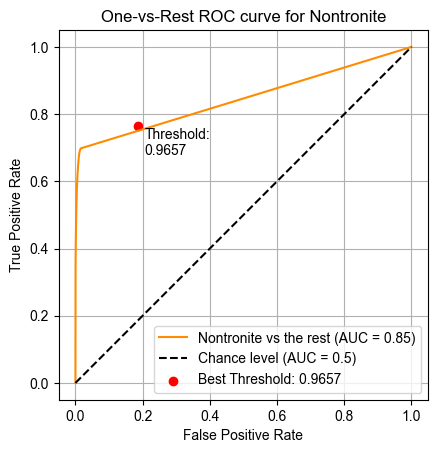

In [25]:
def find_best_threshold(tpr, fpr, thresholds):
    # Calculate the Euclidean distance for each point from the top-left corner
    distances = np.sqrt((1 - tpr)**2 + fpr**2)
    
    # Find the index of the smallest distance
    best_index = np.argmin(distances)
    
    # Return the corresponding threshold and its TPR and FPR
    return thresholds[best_index], fpr[best_index], tpr[best_index]

# Assuming onehot_labels and pred are defined previously
class_id = 3
class_name = list(FULL_NAMES.values())[class_id]

# Compute TPR, FPR, and thresholds
fpr, tpr, thresholds = roc_curve(onehot_labels2[:, class_id], pred2[:, class_id])

# Compute best threshold and its TPR and FPR
best_thresh, best_fpr, best_tpr = find_best_threshold(tpr, fpr, thresholds)
print(f"Best threshold for {class_name}: {best_thresh}")

# Plot ROC curve
RocCurveDisplay.from_predictions(
    onehot_labels[:, class_id],
    pred[:, class_id],
    name=f"{class_name} vs the rest",
    color="darkorange",
    plot_chance_level=True,
)
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"One-vs-Rest ROC curve for {class_name}")

# Plot the best threshold point on the ROC curve
plt.scatter(best_fpr, best_tpr, color='red', label=f"Best Threshold: {best_thresh:.4f}")
annotation_text = f"Threshold:\n{best_thresh:.4f}"
plt.annotate(annotation_text, (best_fpr, best_tpr), textcoords="offset points", xytext=(5,-1), ha='left', va='top')

plt.legend()
plt.grid()
plt.show()
# plt.savefig(f"{class_name}_ROC.png", dpi = 400)


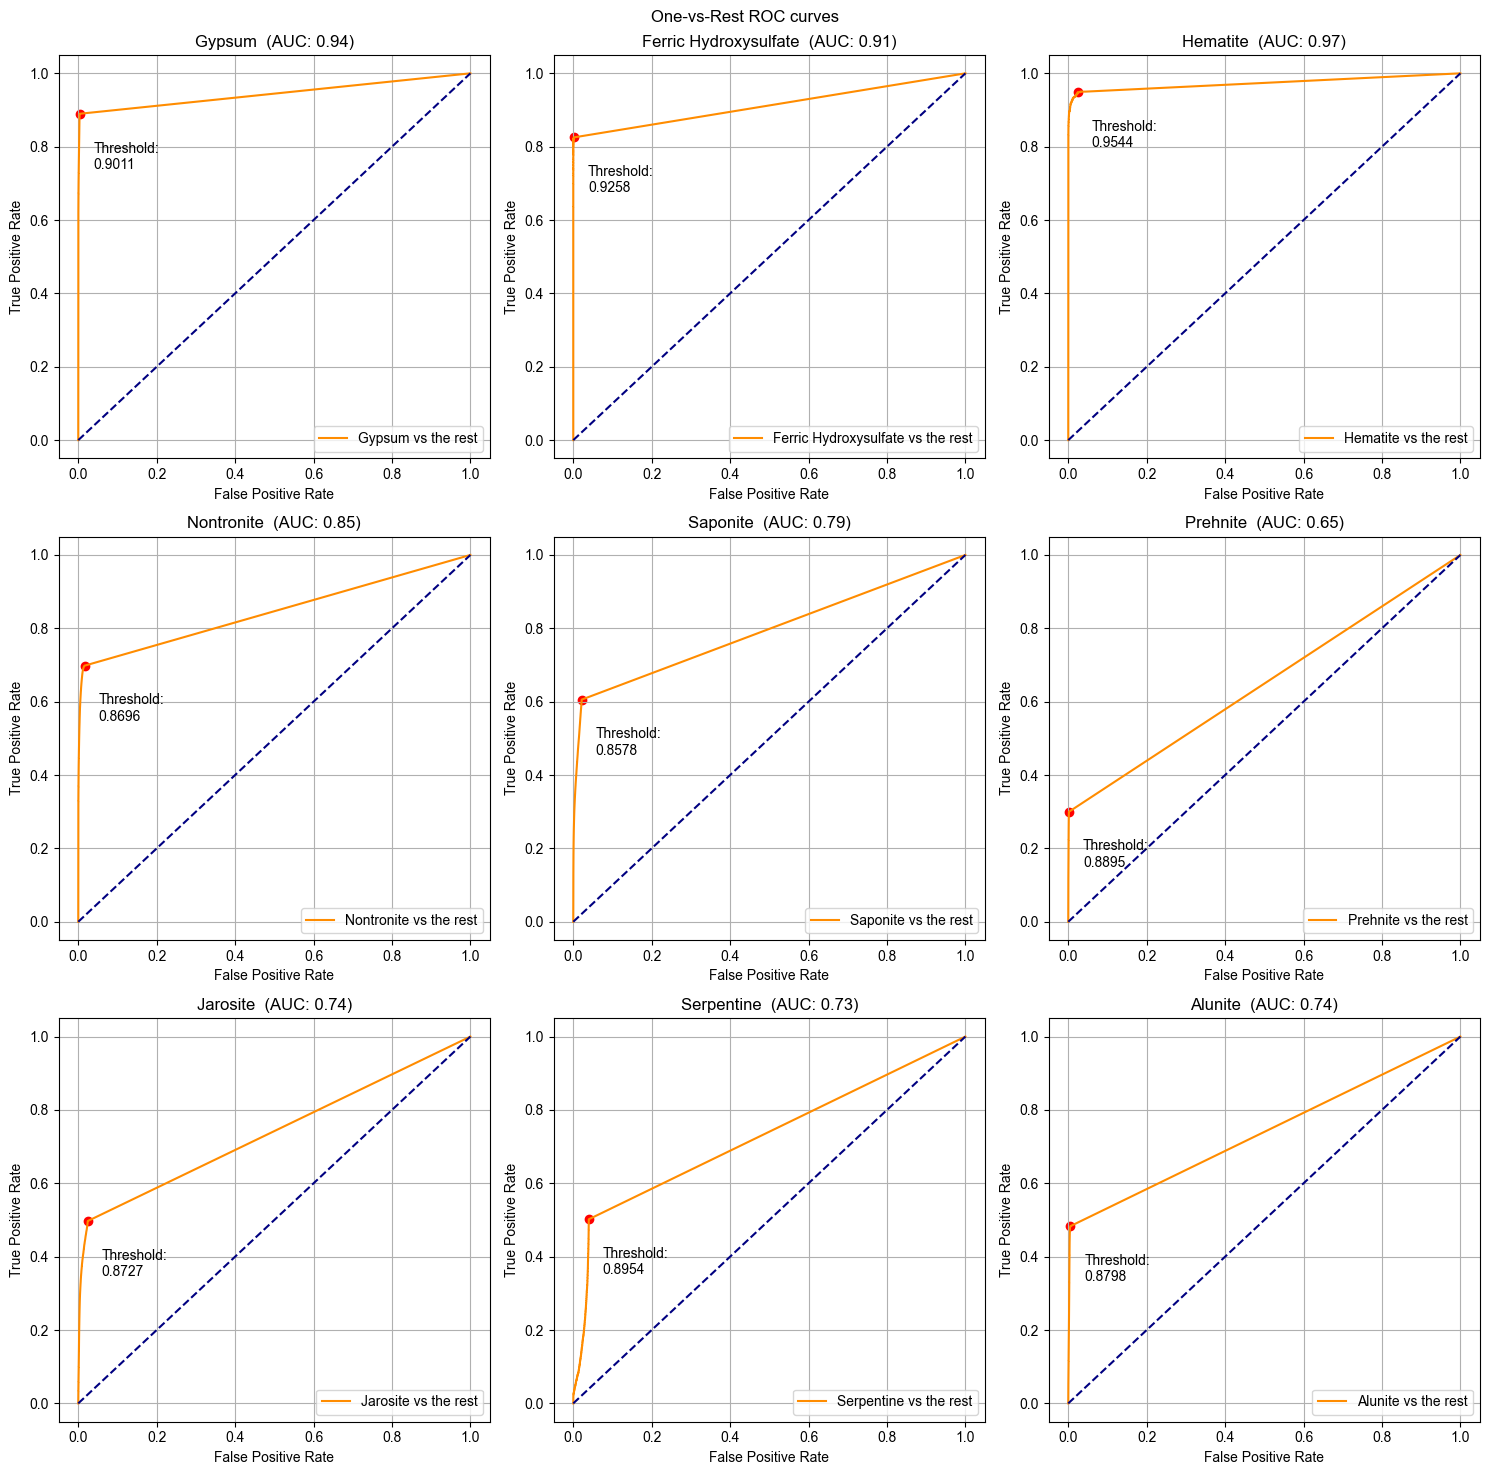

In [11]:


def find_best_threshold(tpr, fpr, thresholds):
    distances = np.sqrt((1 - tpr)**2 + fpr**2)
    best_index = np.argmin(distances)
    return thresholds[best_index], fpr[best_index], tpr[best_index]

# Assuming onehot_labels and pred are defined previously
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle('One-vs-Rest ROC curves')

for class_id in range(9):  # Assuming you have at least 9 classes
    ax = axes[class_id // 3, class_id % 3]  # Determine the row and column for the subplot
    
    class_name = list(FULL_NAMES.values())[class_id]
    
    fpr, tpr, thresholds = roc_curve(onehot_labels[:, class_id], pred[:, class_id])
    best_thresh, best_fpr, best_tpr = find_best_threshold(tpr, fpr, thresholds)
    
    # Compute the AUC
    auc_value = roc_auc_score(onehot_labels[:, class_id], pred[:, class_id])
    
    RocCurveDisplay(fpr=fpr, tpr=tpr).plot(ax=ax, name=f"{class_name} vs the rest", color="darkorange")
    
    ax.scatter(best_fpr, best_tpr, color='red')
    annotation_text = f"Threshold:\n{best_thresh:.4f}"
    ax.annotate(annotation_text, (best_fpr, best_tpr), textcoords="offset points", xytext=(10,-20), ha='left', va='top')
    
    # Plot the diagonal line
    ax.plot([0, 1], [0, 1], color='navy', linestyle='--')
    
    # Display AUC on the plot
    ax.set_title(f"{class_name}  (AUC: {auc_value:.2f})")
    ax.grid(True)

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.savefig('ROC_subplots.png', dpi = 400)
plt.show()



In [9]:
FULL_NAMES = {
    1: 'Gypsum',
    2: 'Ferric Hydroxysulfate',
    3: "Hematite",
    4: 'Nontronite',
    5: 'Saponite',
    6: 'Prehnite',  # Prehnite Zeolite
    7: 'Jarosite',
    8: 'Serpentine',
    9: 'Alunite',
    10: 'Ca/Fe CO3',  # Calcite, Ca/Fe carbonate
    11: 'Beidellite',
    12: 'Kaolinite',
    13: 'Bassanite',
    14: 'Epidote',
    15: 'Montmorillonite',
    16: 'Mg Cl salt',  # Mg(ClO3)2.6H2O
    17: 'Halloysite',
    18: 'Epsomite',
    19: 'Illite/Muscovite',
    20: 'Margarite',
    21: 'Analcime',  # Zeolite
    22: 'Monohydrated sulfate',  # Szomolnokite
    23: 'MgCO3',  # Magnesite
    24: 'Chlorite',
    25: 'Clinochlore',
    26: 'Low Ca Pyroxene',
    27: 'Olivine Forsterite',
    28: 'High Ca Pyroxene',
    29: 'Olivine Fayalite'
}